***STA130 HW5***

Alexander Zubchenko

***A.***

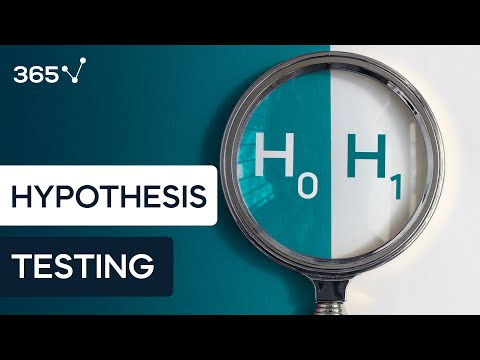

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

***B.***

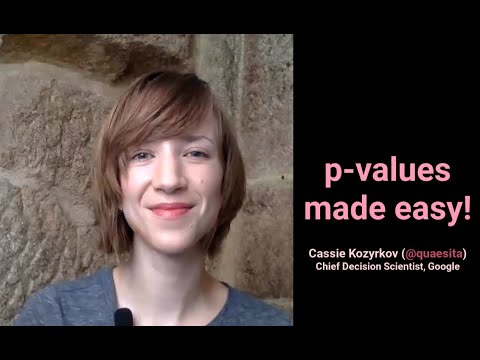

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

***2.***

The outcomes of tests refer to the population parameter, rather than the sample statistic. When we take a sample of a population, we're taking a portion of the population for which we believe closely represents the entirety of the population. Essentially, we choose this sample because we believe the observed sample highly resemble that of the true population. From this sample, we can conclude the sample average (or other sample statistic). The result of this tells us something about the population, not just the sample. In other words, we use the sample to learn or conclude something about the population parameter.

***4.***

**The second "Pre-lecture" video (above) suggests that a smaller p-value makes the null hypothesis look more ridiculous. Explain why this is in your own words in a way that makes the most sense to you, clarifying the meaning of any technical statistical terminology you use in your answer.**

We use the P value to determine the probability of an observation occurring, assuming the null hypothesis is true. 

For starters, the null hypothesis is a normal assumption which we are testing. When we collect data as our sample, we can calculate statistics based on our sample, and determine the probability of such statistics occuring under the null hypothesis. If our statistics are highly likely under the null hypothesis, we assign the P value (probability) a very high number. If our statistics are unlikely, we assign the P value a very low number.

So, a smaller p-value makes the null hypothesis look more ridiculous becuase it emplies the observations are highly unlikely to occur if the null hypothesis were true. Although the p-value does not directly tell us whether the null hypothesis is true or false, a very low p-value does increase the odds that the null hypothesis is false. 

***8.***

***Null hypothesis:*** There is no difference whether the milk or tea was poured first. Therefore, there is no difference in students' ability to identify the order of pouring.

Informally: If the null hypothesis is true, it means that there is no difference in the order of pouring and that students have no way of determining which drink is which. Therefore, any correct or incorrect guesses were made by complete chance.

***Alternative hypothesis:*** There is a difference whether the milk or tea was poured first. There is a way to identify each option with greater precision than random guessing.

**Population:** All students in STA130 who have the ability to taste tea.
    
**Sample:** A randomly selected portion of 80 students in STA130.
    
**Parameter of Interest:** The parameter of interest is the true proportion of STA130 students who can correctly identify the order in which the milk and tea were poured. This is the proportion of the entire population that can make the correct determination, which we want to estimate based on our sample data.

In summary, we want to estimate the TRUE P-value for all students in STA130. The P-values determined from our sample data will be used to estimate the TRUE p-value.

***Difference between Fisher's experiment:*** This experiment slightly differs from Fisher's original tea experiment because, while Fisher focused on a small, specific group (his colleague Dr. Bristol) to test her ability to distinguish between two tea preparation methods, our analysis involves a larger and more diverse sample of 80 STA130 students. By examining the entire class, we aim to assess the general ability of this broader population to identify the order of pouring, rather than just testing one individual's skill.

***Simulation:***
    
We'll simulate the sampling distribution under the null hypothesis 

This means we assume that if the null hypothesis is true, any correctly identified cup of tea should be due to random guessing.

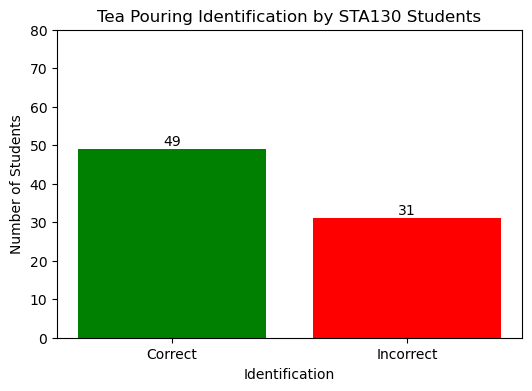

In [9]:
import matplotlib.pyplot as plt

# Data
correct = 49
incorrect = 80 - correct  # Total students minus correct

# Labels and values for the bar chart
labels = ['Correct', 'Incorrect']
values = [correct, incorrect]

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Tea Pouring Identification by STA130 Students')
plt.xlabel('Identification')
plt.ylabel('Number of Students')
plt.ylim(0, 80)

# Add data labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center')

# Show the plot
plt.show()


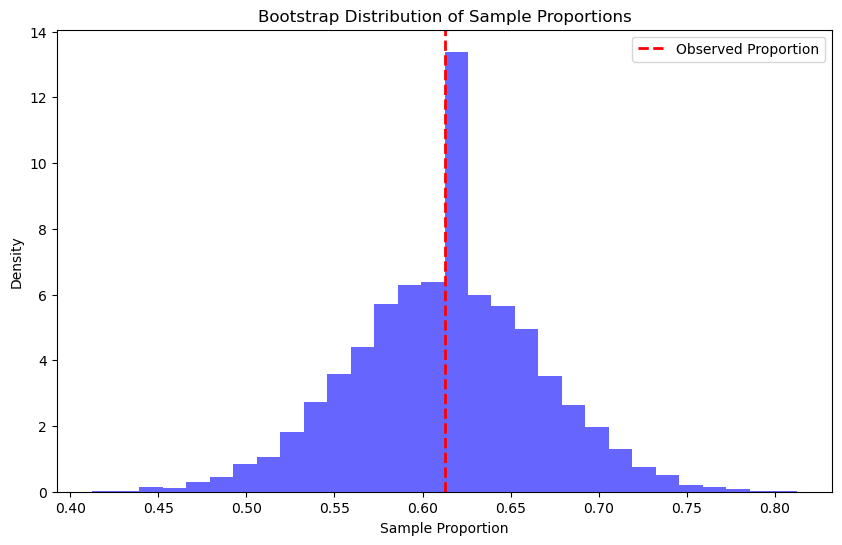

Observed Proportion: 0.6125
P-value: 0.5431


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data
observed_successes = 49
n = 80  # Total students

# Setting the random seed for reproducibility
np.random.seed(2)

# Bootstrap parameters
num_bootstrap_samples = 10000
bootstrap_proportions = []

# Create an array representing the data (1 for correct, 0 for incorrect)
data = np.array([1] * observed_successes + [0] * (n - observed_successes))

# Bootstrap sampling
for _ in range(num_bootstrap_samples):
    sample = np.random.choice(data, size=n, replace=True)  # Resample with replacement
    proportion = np.mean(sample)  # Calculate the sample proportion
    bootstrap_proportions.append(proportion)

# Calculate observed proportion
observed_proportion = observed_successes / n

# Calculate p-value
# Here we are interested in how many times the bootstrap proportion is less than or equal to the observed proportion
p_value = np.mean(np.array(bootstrap_proportions) <= observed_proportion)

# Plotting the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_proportions, bins=30, density=True, alpha=0.6, color='blue')
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=2, label='Observed Proportion')
plt.title('Bootstrap Distribution of Sample Proportions')
plt.xlabel('Sample Proportion')
plt.ylabel('Density')
plt.legend()
plt.show()

# Output results
print(f"Observed Proportion: {observed_proportion:.4f}")
print(f"P-value: {p_value:.4f}")



Overall, the observed P-value of 0.5431 is within 0.05 of the expected P-value of the null hypothesis. 

It is important to note that while Bristol's experiment focused on one individual who may have a unique ability to taste the difference, this analysis encompasses an entire class of students. It is indeed possible that one student in the class could perfectly identify the difference while others cannot. However, the overall performance of the class does not provide strong evidence that the order of pouring affects the taste of the tea.